# Classification Error Metric Challenges
**Settings: Where applicable, use test_size=0.30, random_state=4444. This will permit comparison of results across users.

These reference the Classification Challenges.



In [372]:
# Python 2 & 3 Compatibility
from __future__ import print_function, division

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

sns.set()

In [373]:
from sklearn.metrics import accuracy_score, classification_report

In [374]:
votes = pd.read_csv('house-votes-84.data', header=None)
votes.columns = ['party',\
                 'v01','v02','v03','v04','v05','v06','v07','v08','v09','v10','v11','v12','v13','v14','v15','v16']
votes = votes.replace('y', 1)
votes = votes.replace('n', 0)
votes = votes.replace('?', np.NaN)
votes.fillna(votes.mean(), inplace = True) 

In [375]:
movies = pd.read_csv('2013_movies.csv')
movies['ReleaseDate'] = movies.apply(lambda x: (pd.to_datetime(x['ReleaseDate'])), axis=1)
movies['ShortDate'] = movies.apply(lambda x: \
                                   (x['ReleaseDate'].strftime('%m')+"-"+x['ReleaseDate'].strftime('%d')), axis=1)
movies['Month'] = movies.apply(lambda x: \
                                   (x['ReleaseDate'].strftime('%m')), axis=1)
movies['ReleaseDate'] = movies['ReleaseDate'].dt.date
movies.dropna(inplace=True)

In [376]:
haberman = pd.read_csv('haberman.data')

haberman.columns = ['age', 'year', 'nodes', 'survival']

# Challenge 1
For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

In [377]:
y = votes.pop('party')
X = votes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
y_test_binary = [0 if x=='democrat' else 1 for x in y_test]

In [378]:
lr = LogisticRegression(C=1, solver='lbfgs')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.9312977099236641

In [379]:
print("Accuracy: %.3f"% accuracy_score(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Accuracy: 0.931
              precision    recall  f1-score   support

    democrat       0.91      0.97      0.94        77
  republican       0.96      0.87      0.91        54

   micro avg       0.93      0.93      0.93       131
   macro avg       0.94      0.92      0.93       131
weighted avg       0.93      0.93      0.93       131



In [380]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn.predict(X_test))

0.9312977099236641

In [381]:
print("Accuracy: %.3f"% accuracy_score(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy: 0.931
              precision    recall  f1-score   support

    democrat       0.94      0.95      0.94        77
  republican       0.92      0.91      0.92        54

   micro avg       0.93      0.93      0.93       131
   macro avg       0.93      0.93      0.93       131
weighted avg       0.93      0.93      0.93       131



In [382]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
metrics.accuracy_score(y_test, gnb.predict(X_test))

0.9389312977099237

In [383]:
print("Accuracy: %.3f"% accuracy_score(y_test, gnb.predict(X_test)))
print(classification_report(y_test, gnb.predict(X_test)))

Accuracy: 0.939
              precision    recall  f1-score   support

    democrat       0.92      0.99      0.95        77
  republican       0.98      0.87      0.92        54

   micro avg       0.94      0.94      0.94       131
   macro avg       0.95      0.93      0.94       131
weighted avg       0.94      0.94      0.94       131



In [384]:
svc = SVC(gamma='scale')
svc.fit(X_train, y_train)
metrics.accuracy_score(y_test, svc.predict(X_test))

0.9541984732824428

In [385]:
print("Accuracy: %.3f"% accuracy_score(y_test, svc.predict(X_test)))
print(classification_report(y_test, svc.predict(X_test)))

Accuracy: 0.954
              precision    recall  f1-score   support

    democrat       0.95      0.97      0.96        77
  republican       0.96      0.93      0.94        54

   micro avg       0.95      0.95      0.95       131
   macro avg       0.96      0.95      0.95       131
weighted avg       0.95      0.95      0.95       131



In [386]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
metrics.accuracy_score(y_test, dtc.predict(X_test))

0.9389312977099237

In [387]:
print("Accuracy: %.3f"% accuracy_score(y_test, dtc.predict(X_test)))
print(classification_report(y_test, dtc.predict(X_test)))

Accuracy: 0.939
              precision    recall  f1-score   support

    democrat       0.93      0.97      0.95        77
  republican       0.96      0.89      0.92        54

   micro avg       0.94      0.94      0.94       131
   macro avg       0.94      0.93      0.94       131
weighted avg       0.94      0.94      0.94       131



In [388]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
metrics.accuracy_score(y_test, rfc.predict(X_test))

0.9465648854961832

In [389]:
print("Accuracy: %.3f"% accuracy_score(y_test, rfc.predict(X_test)))
print(classification_report(y_test, rfc.predict(X_test)))

Accuracy: 0.947
              precision    recall  f1-score   support

    democrat       0.93      0.99      0.96        77
  republican       0.98      0.89      0.93        54

   micro avg       0.95      0.95      0.95       131
   macro avg       0.95      0.94      0.94       131
weighted avg       0.95      0.95      0.95       131



# Challenge 2
For each, draw the ROC curve and calculate the AUC.

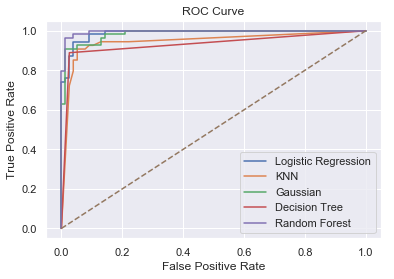

In [390]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
scores = []

fpr, tpr, _ = roc_curve(np.array(y_test_binary), lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
scores.append(['Logistic Regression', roc_auc_score(np.array(y_test_binary), lr.predict_proba(X_test)[:,1])])

fpr, tpr, _ = roc_curve(np.array(y_test_binary), knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
scores.append(['KNN', roc_auc_score(np.array(y_test_binary), knn.predict_proba(X_test)[:,1])])

fpr, tpr, _ = roc_curve(np.array(y_test_binary), gnb.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
scores.append(['Gaussian NB', roc_auc_score(np.array(y_test_binary), gnb.predict_proba(X_test)[:,1])])

# fpr, tpr, _ = roc_curve(np.array(y_test_binary), svc.predict_proba(X_test)[:,1])
# plt.plot(fpr, tpr)
# scores.append(['SVC', roc_auc_score(np.array(y_test_binary), svc.predict_proba(X_test)[:,1])])

fpr, tpr, _ = roc_curve(np.array(y_test_binary), dtc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
scores.append(['Decision Tree', roc_auc_score(np.array(y_test_binary), dtc.predict_proba(X_test)[:,1])])

fpr, tpr, _ = roc_curve(np.array(y_test_binary), rfc.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
scores.append(['Random Forest', roc_auc_score(np.array(y_test_binary), rfc.predict_proba(X_test)[:,1])])

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression', 'KNN', 'Gaussian', 'Decision Tree', 'Random Forest'])

In [391]:
scores

[['Logistic Regression', 0.987974987974988],
 ['KNN', 0.9455266955266955],
 ['Gaussian NB', 0.9841269841269841],
 ['Decision Tree', 0.9314574314574314],
 ['Random Forest', 0.9954304954304956]]

# Challenge 3
Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

In [392]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=4444)

In [393]:
estimator = LogisticRegression(C=1, solver='lbfgs')
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9572519083969466, 0.015792489210364264)

In [394]:
estimator = KNeighborsClassifier(n_neighbors=6)
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9309923664122138, 0.02019426658172393)

In [395]:
estimator = GaussianNB()
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9405343511450382, 0.016734628252914455)

In [396]:
estimator = SVC(gamma='scale')
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9555725190839697, 0.01569551784252332)

In [397]:
estimator = DecisionTreeClassifier()
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9332824427480919, 0.021472510386307344)

In [398]:
estimator = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(estimator, X, y, cv=cv)
np.mean(scores), np.std(scores)

(0.9595419847328246, 0.01569997236733062)

# Challenge 4
For your movie classifiers, calculate the precision and recall for each class.

In [399]:
movies.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,ShortDate,Month
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22,11-22,11
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03,05-03,05
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,11-22,11
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,07-03,07
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14,06-14,06


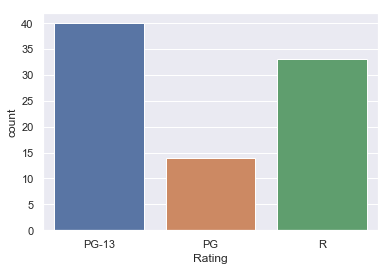

In [400]:
sns.countplot(movies.Rating)

In [401]:
y = movies.pop('Rating')
X = movies[['Budget', 'DomesticTotalGross', 'Runtime']]

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=4444)

In [403]:
lr = LogisticRegression(C=1, solver='lbfgs', multi_class='multinomial')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5555555555555556

In [404]:
print("Accuracy: %.3f"% accuracy_score(y_test, lr.predict(X_test)))
print(classification_report(y_test, lr.predict(X_test)))

Accuracy: 0.556
              precision    recall  f1-score   support

          PG       0.00      0.00      0.00         3
       PG-13       0.43      1.00      0.60         3
           R       1.00      0.67      0.80         3

   micro avg       0.56      0.56      0.56         9
   macro avg       0.48      0.56      0.47         9
weighted avg       0.48      0.56      0.47         9



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [405]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
metrics.accuracy_score(y_test, knn.predict(X_test))

0.5555555555555556

In [406]:
print("Accuracy: %.3f"% accuracy_score(y_test, knn.predict(X_test)))
print(classification_report(y_test, knn.predict(X_test)))

Accuracy: 0.556
              precision    recall  f1-score   support

          PG       1.00      0.33      0.50         3
       PG-13       0.50      0.33      0.40         3
           R       0.50      1.00      0.67         3

   micro avg       0.56      0.56      0.56         9
   macro avg       0.67      0.56      0.52         9
weighted avg       0.67      0.56      0.52         9



# Challenge 5
Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [407]:
y = haberman.pop('survival')
X = haberman
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=4444)
y_train_binary = [1 if x==2 else 0 for x in y_train]
y_test_binary = [1 if x==2 else 0 for x in y_test]

In [408]:
lm1 = LogisticRegression(C=1, solver='lbfgs')
lm1.fit(X_train, y_train)
lm1.score(X_train, y_train)

0.7464788732394366

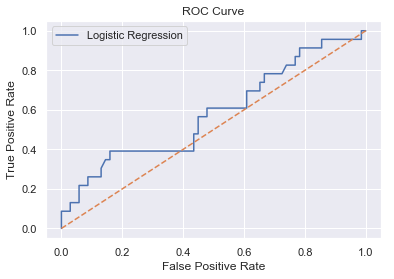

In [409]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
scores = []

fpr, tpr, _ = roc_curve(np.array(y_test_binary), lr.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
scores.append(['Logistic Regression', roc_auc_score(np.array(y_test_binary), lr.predict_proba(X_test)[:,1])])

x = np.linspace(0,1, 100000)
plt.plot(x, x, linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression'])